In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/agungprema/Downloads/Raw data corrected.csv')
df.head()

,Grouping,Age (years),Education,Working status,Marital status,Menarche (years),Menopause,First pregnancy,Parity,Breastfeeding,Highfat,BMI,Ethnicity
0,BC,>= 50,Senior high school,Housewife,Marriage,12 to 13,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Obesity,Minangnese
1,Non-BC,>= 50,Vocational degree,Master's student,Single/ widow,>13,< 50 years,>30 years,>= Multiparous,<12 months,High,Normal,Minangnese
2,BC,>= 50,Senior high school,Housewife,Marriage,7 to 11,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Normal,Javanese
3,Non-BC,>= 50,Senior high school,Master's student,Marriage,12 to 13,< 50 years,20-29 years,Primiparous,>=12 months,High,Normal,Javanese
4,BC,>= 50,Senior high school,Private servant,Marriage,>13,< 50 years,20-29 years,>= Multiparous,>=12 months,High,Normal,Minangnese


In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
prep_data = enc.fit_transform(df)

In [4]:
prep_data = pd.DataFrame(prep_data, columns=df.columns)
prep_data.head()

,Grouping,Age (years),Education,Working status,Marital status,Menarche (years),Menopause,First pregnancy,Parity,Breastfeeding,Highfat,BMI,Ethnicity
0,0.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,1.0,6.0,4.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
4,0.0,1.0,4.0,5.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
X = prep_data.drop(columns='Grouping')
y = prep_data['Grouping']

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Grouping          400 non-null    object
 1   Age (years)       400 non-null    object
 2   Education         400 non-null    object
 3   Working status    400 non-null    object
 4   Marital status    400 non-null    object
 5   Menarche (years)  400 non-null    object
 6   Menopause         400 non-null    object
 7   First pregnancy   398 non-null    object
 8   Parity            400 non-null    object
 9   Breastfeeding     400 non-null    object
 10  Highfat           400 non-null    object
 11  BMI               400 non-null    object
 12  Ethnicity         400 non-null    object
dtypes: object(13)
memory usage: 40.8+ KB
None


In [7]:
print(df.describe(include='all'))

       Grouping Age (years)           Education Working status Marital status  \
count       400         400                 400            400            400   
unique        2           2                   7              7              2   
top          BC       >= 50  Senior high school      Housewife       Marriage   
freq        200         221                 159            220            362   

       Menarche (years)   Menopause First pregnancy          Parity  \
count               400         400             398             400   
unique                3           2               3               3   
top           12  to 13  < 50 years     20-29 years  >= Multiparous   
freq                190         200             284             334   

       Breastfeeding Highfat     BMI   Ethnicity  
count            400     400     400         400  
unique             2       2       3           2  
top      >=12 months    High  Normal  Minangnese  
freq             355     280     2

In [8]:
df = df.dropna()
print(df.describe(include='all'))

       Grouping Age (years)           Education Working status Marital status  \
count       398         398                 398            398            398   
unique        2           2                   7              7              2   
top          BC       >= 50  Senior high school      Housewife       Marriage   
freq        199         219                 158            218            360   

       Menarche (years)   Menopause First pregnancy          Parity  \
count               398         398             398             398   
unique                3           2               3               3   
top           12  to 13  < 50 years     20-29 years  >= Multiparous   
freq                189         199             284             334   

       Breastfeeding Highfat     BMI   Ethnicity  
count            398     398     398         398  
unique             2       2       3           2  
top      >=12 months    High  Normal  Minangnese  
freq             353     278     2

In [24]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   Grouping_Non-BC  Age (years)_>= 50  Education_Junior high school  \
0            False               True                         False   
1             True               True                         False   
2            False               True                         False   
3             True               True                         False   
4            False               True                         False   

   Education_Master degree  Education_No school  Education_Senior high school  \
0                    False                False                          True   
1                    False                False                         False   
2                    False                False                          True   
3                    False                False                          True   
4                    False                False                          True   

   Education_Undergraduate degree  Education_Vocational degree  \
0                   

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf_model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[32 12]
 [ 7 29]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77        44
         1.0       0.71      0.81      0.75        36

    accuracy                           0.76        80
   macro avg       0.76      0.77      0.76        80
weighted avg       0.77      0.76      0.76        80


Accuracy Score:
0.7625


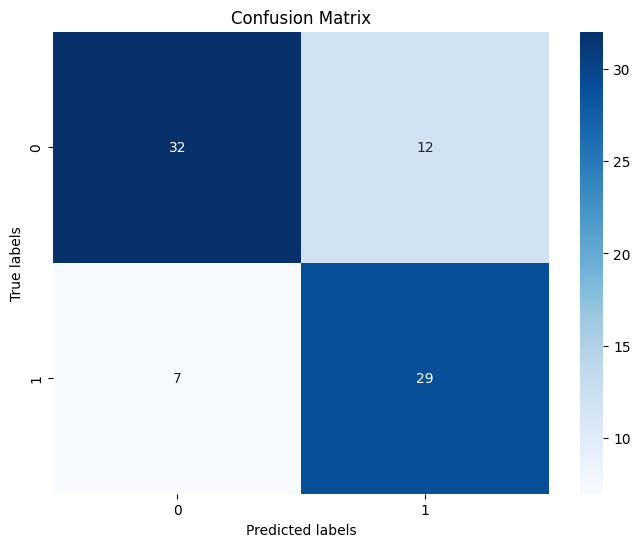

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
